## <i> <span style='color:red'>MULTIPLE LINEAR REGRESSION:STARTUPS DATA</i></span>
###  Problem Statment :Prepare a prediction model for the profit of 50_startups data.Do transformations for getting better predictions of profit .Creating a table containing Rsquared value for each prepared model.


In [1]:
#!pip install ml_metrics

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

from ml_metrics import rmse

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file
startups = pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Checking the basic info 
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There is no Null value present in side the data set and also the data types are appopriate in all attributes

In [5]:
# Dropping the unnecessery features
startups1 = startups.drop('State', axis = 1)
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
#Rename the R&D Spend as R&D_S , Administration as Admin and Marketing Spend as MktSpnd
startups2 = startups1.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MktSpnd'}, axis=1)
startups2.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
# Dropping duplicate values if there any
startups2[startups2.duplicated(keep = False)]

,RDS,Admin,MktSpnd,Profit


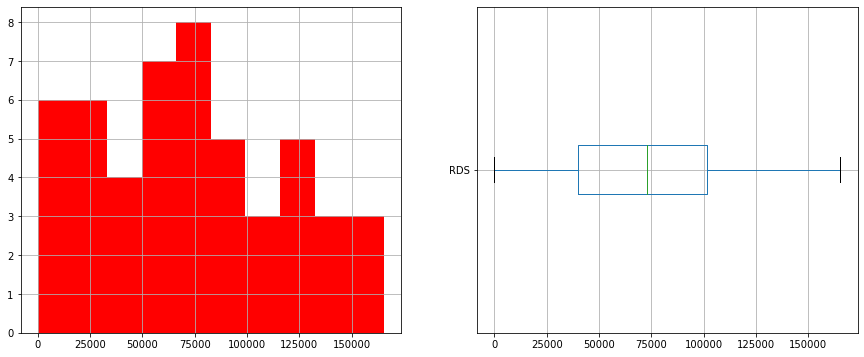

In [8]:
#check whether outliers are present in R&D_S column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['RDS'].hist(color='red')
plt.subplot(1,2,2)
startups2.boxplot(column=['RDS'],vert=False)

plt.show()

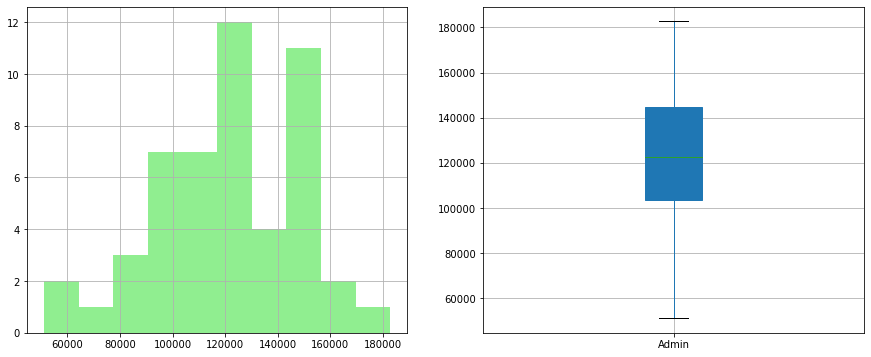

In [9]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Admin'].hist(color='lightgreen')
plt.subplot(1,2,2)
startups2.boxplot(column=['Admin'],patch_artist=True)

plt.show()

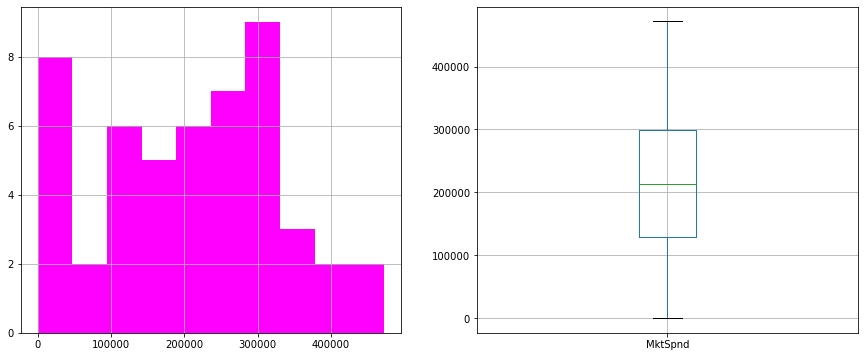

In [10]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['MktSpnd'].hist(color='magenta')
plt.subplot(1,2,2)
startups2.boxplot(column=['MktSpnd'])

plt.show()

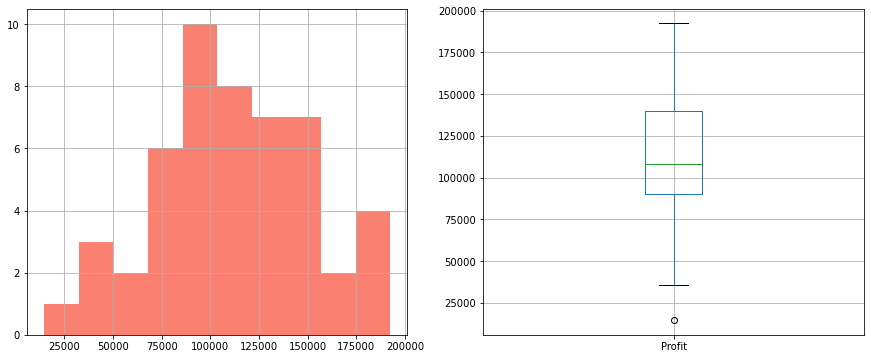

In [11]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Profit'].hist(color='salmon')
plt.subplot(1,2,2)
startups2.boxplot(column=['Profit'])

plt.show()

### Kde plot-To check whether the datas are normally distributed or not

<AxesSubplot:xlabel='Profit', ylabel='Density'>

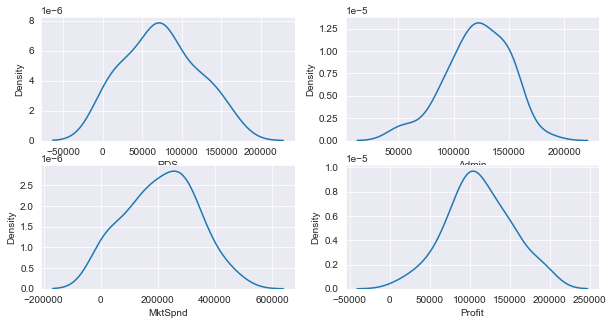

In [44]:
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
sns.kdeplot(startups2['RDS'])
plt.subplot(2,2,2)
sns.kdeplot(startups2['Admin'])
plt.subplot(2,2,3)
sns.kdeplot(startups2['MktSpnd'])
plt.subplot(2,2,4)
sns.kdeplot(startups2['Profit'])

In [13]:
#Correlation matrix
startups2.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


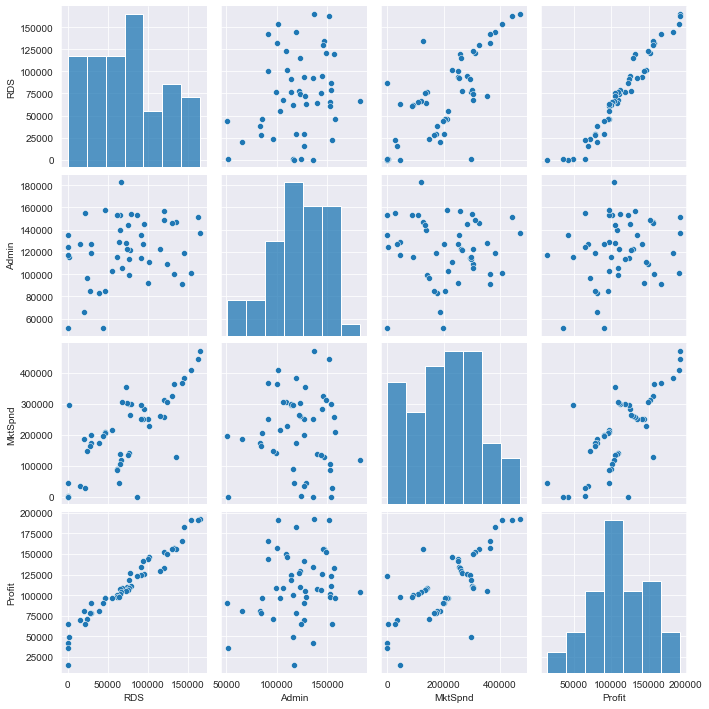

In [14]:
### Scatterplot between all variables, using pairplot
sns.set_style(style='darkgrid')
sns.pairplot(startups2)


### Model1- Creating a model to predict profit with better accuracy and low error, without using any transformation

In [15]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups2).fit()

In [16]:
# Coefficients
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

In [17]:
# checking the t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


In [18]:
# Rsquared and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        14:11:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
pred1=model1.predict(startups2)
actual=startups2.Profit
r1=rmse(pred1,actual)
r1

8855.344489015142

### Test for Normality of Residuals (Q-Q Plot)

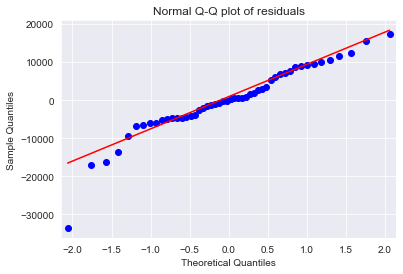

In [21]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

### Residual plot for homoscedasticity

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

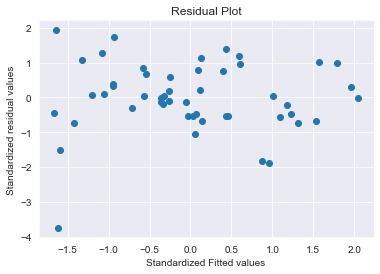

In [24]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Detecting influencers/outliers- By Cook's distance and influence plot

In [25]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

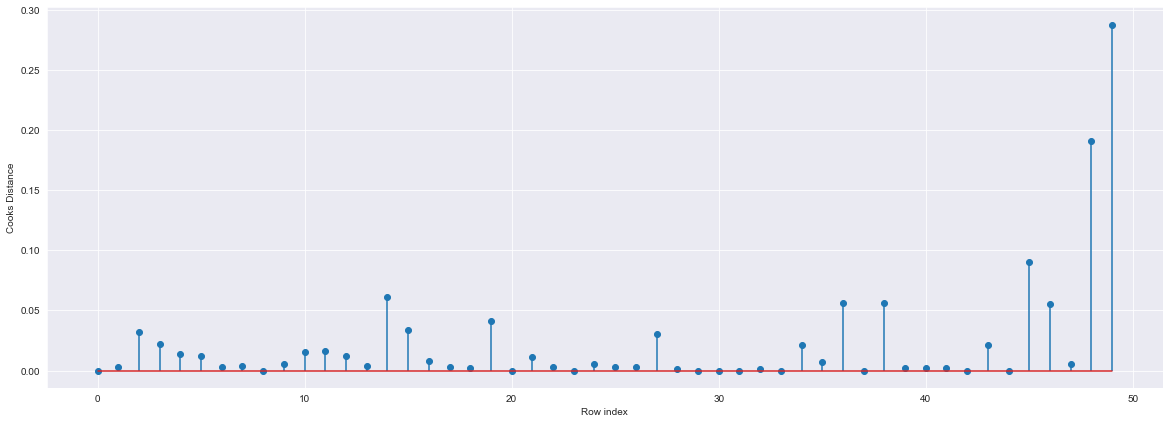

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

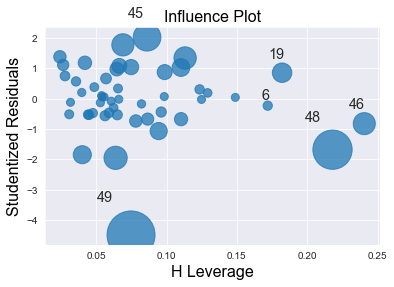

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [29]:
k = startups2.shape[1]
n = startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### From the visualization it is evident that at the index of 49  which is highly influenced so we are droping the data from our dataset

In [30]:
startups2[startups2.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [31]:
startups3=startups2.drop(startups2.index[[49]],axis=0).reset_index()

In [32]:
startups3=startups3.drop(['index'],axis=1)

In [33]:
startups3.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Model2-Predicting a new model(with outlier removed dataset)

In [34]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()

In [35]:
##Coefficent
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           8.85e-32
Time:                        14:11:57   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
actual1=startups3.Profit

In [38]:
pred2=model2.predict(startups3)
r2=rmse(pred2,actual1)
r2

7430.589093678348

### creating a table with all the obsevations

In [39]:
df = {'Model':['Model1','Model2'],'R_Squared Value':(model1.rsquared,model2.rsquared),
     "RMSE":(r1,r2)
     }

In [40]:
R_Square_Table = pd.DataFrame(df)
R_Square_Table 

,Model,R_Squared Value,RMSE
0,Model1,0.950746,8855.344489
1,Model2,0.961316,7430.589094


## Inference:
### From all the observations and calculations it is evident that Model2 is the best model to predict profit with a better accuracy, since it has the highest rsquared value and lowest rmse value.